1.0


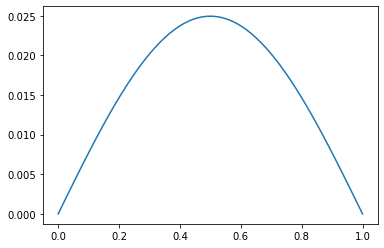

In [40]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

#Preparing the sine-shaped histogram that will be used in the initialisation
L = 1
n = 1
x = np.linspace(0,L, num=64)
storage_for_normalisation = []


Normalisation_wavefunction = (np.sqrt(2/L)*(np.sin(n*pi*x/L)))

Normalisation_Constant = np.sum(Normalisation_wavefunction)

waveFunction = (math.sqrt(2/L)*np.sin(n*math.pi*x/L)/(Normalisation_Constant))

print(np.sum(waveFunction))

plt.plot(x,(waveFunction))
plt.show()

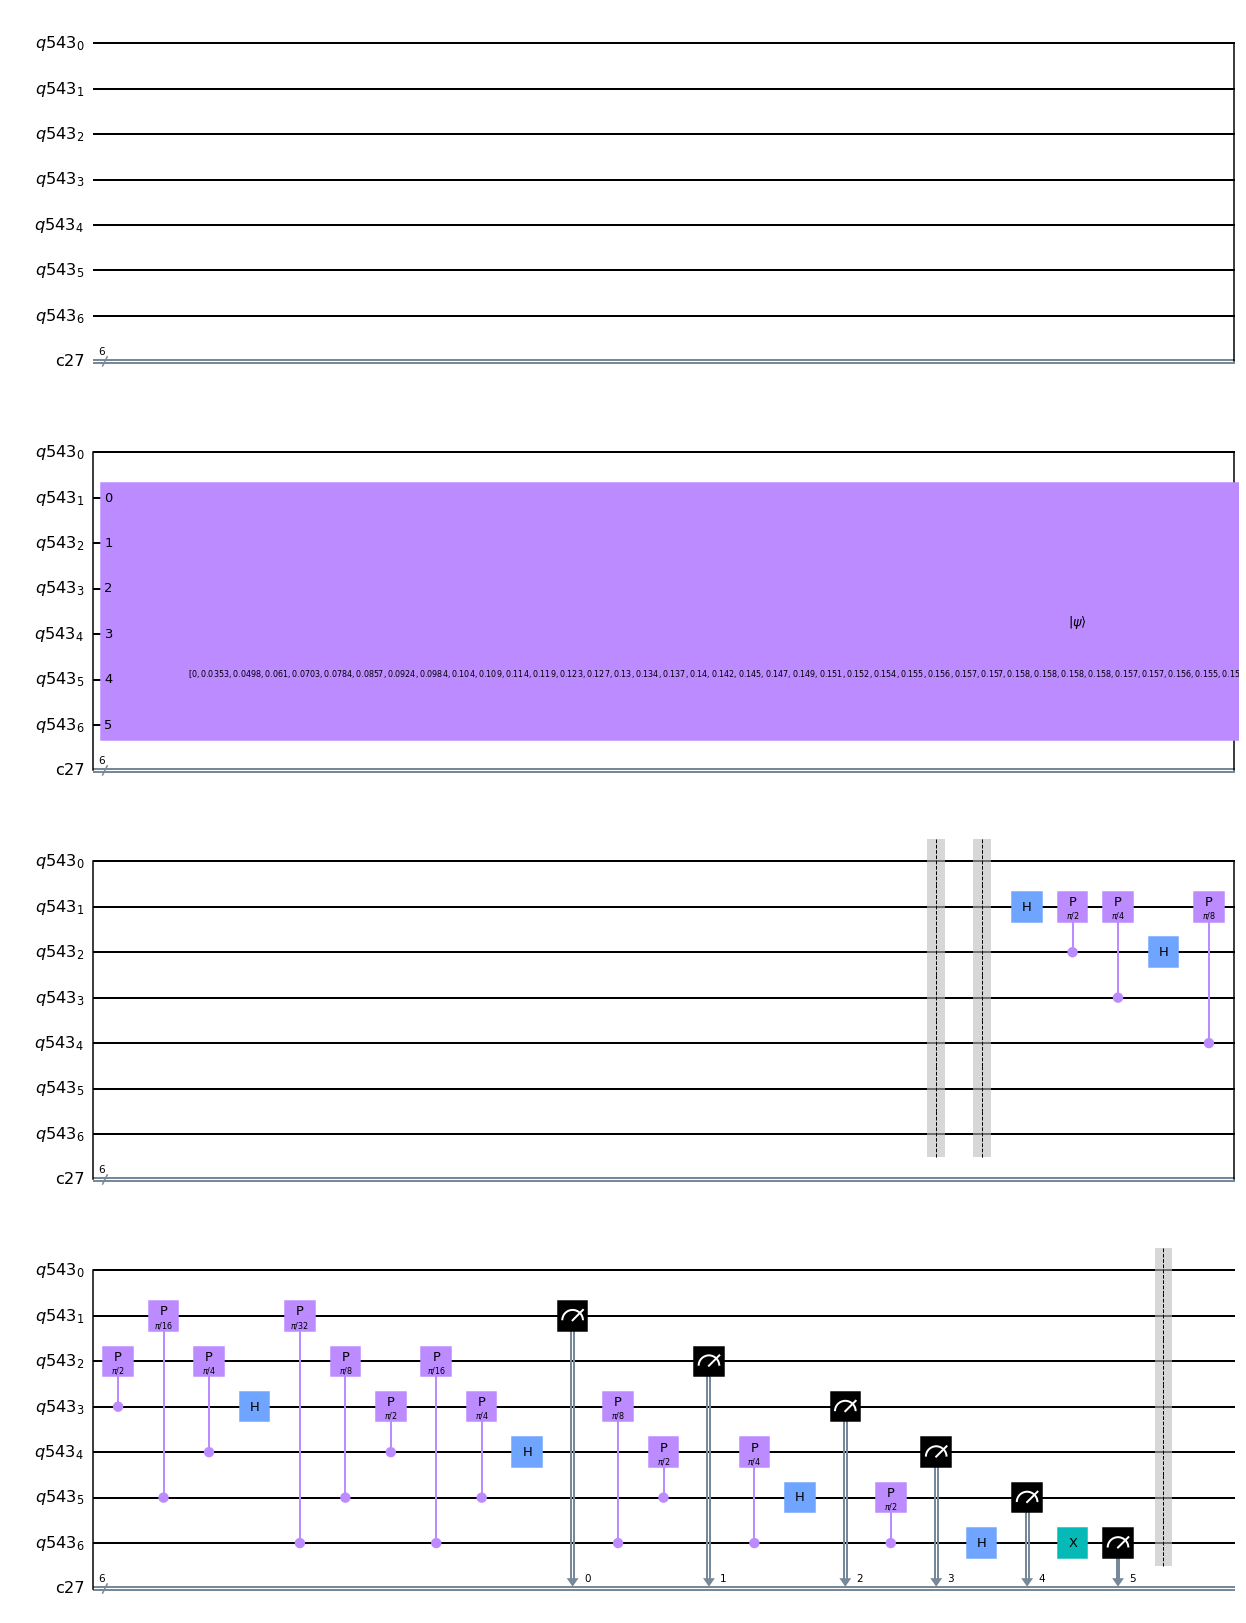

In [64]:


#n = 6 #number of qubits not including ancilla
phi = 0


qubits = 7
cbits = 6

q = QuantumRegister(qubits)
c = ClassicalRegister(cbits)
qc = QuantumCircuit(q,c)

qc2 = QuantumCircuit(q,c)

#Initialisation


#################################################################################################################


qc.initialize(np.sqrt(waveFunction), [q[1],q[2],q[3],q[4],q[5],q[6]])


#qc2.initialize(histnorm, [q[1],q[2],q[3],q[4],q[5],q[6]])



#######################################################################################################################



#qc.initialize(amplitude, [q[1],q[2],q[3],q[4],q[5],q[6]])
#qc2.initialize(amplitude, [q[1],q[2],q[3],q[4],q[5],q[6]])

#Attempt at Gaussian Curve

#gauss = =1/(math.sqrt(2*(15)))*math.exp(-0.5*x^2)




qc.barrier()

#QFT


            

            
qc.barrier()

qc.h(1); qc.cp(pi/2,2,1); qc.cp(pi/4,3,1); qc.cp(pi/8,4,1); qc.cp(pi/16,5,1); qc.cp(pi/32,6,1)
qc.h(2); qc.cp(pi/2,3,2); qc.cp(pi/4,4,2); qc.cp(pi/8,5,2); qc.cp(pi/16,6,2)
qc.h(3); qc.cp(pi/2,4,3); qc.cp(pi/4,5,3); qc.cp(pi/8,6,3)
qc.h(4); qc.cp(pi/2,5,4); qc.cp(pi/4,6,4)
qc.h(5); qc.cp(pi/2,6,5);
qc.h(6)

qc.x(6)
#qc.swap(3,4)
#qc.swap(2,5)
#qc.swap(1,6)

for k in range(6):
    qc.measure(k+1,k)
   # qc2.measure(k+1,k)

qc.barrier()
"""

n = 6
#Time Step
for i in range (n):
    qc.p(phi/(2**(i+n-3)), n-1-i)
    for i in range (n):
        for j in range (i+1,n):
            qc.cx(n-1-j, n)
            qc.cx(n-1-i, n)
            qc.p(phi* (2**(2-i-j)), n) #2-i-j or 4?
            qc.cx(n-1-i, n)
            qc.cx(n-1-j, n)
    
    





#Inverse QFT
qc.x(6)
qc.h(6)
qc.cp(-pi/2,6,5); qc.h(5)
qc.cp(-pi/2,5,4); qc.cp(-pi/4,6,4); qc.h(4)
qc.cp(-pi/2,4,3); qc.cp(-pi/4,5,3); qc.cp(-pi/8,6,3); qc.h(3)
qc.cp(-pi/2,3,2); qc.cp(-pi/4,4,2); qc.cp(-pi/8,5,2); qc.cp(-pi/16,6,2); qc.h(2)
qc.cp(-pi/2,2,1); qc.cp(-pi/4,3,1); qc.cp(-pi/8,4,1); qc.cp(-pi/16,5,1); qc.cp(-pi/32,6,1); qc.h(1)

#qc.swap(3,4)
#qc.swap(2,5)
#qc.swap(1,6)


qc.barrier()


#Measurement

for k in range(6):
    qc.measure(k+1,k)
   # qc2.measure(k+1,k)


"""

qc.draw('mpl')


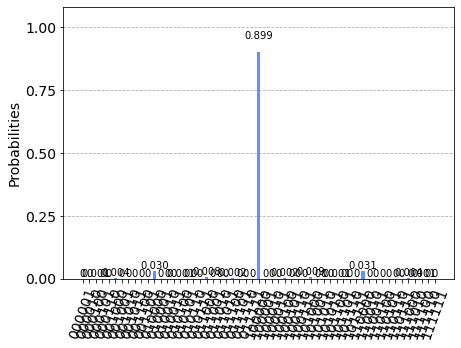

In [65]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 65536
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)